<a href="https://colab.research.google.com/github/Daivar/ML-models-training/blob/main/%E2%80%9ELife_expectancy_ipynb%E2%80%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
life_exp = pd.read_csv('Life Expectancy Data.csv')
life_exp.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [34]:

life_exp.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Bulgaria,Country_Burkina Faso,...,Country_Romania,Country_Russian Federation,Country_Rwanda,Country_Samoa,Country_Sao Tome and Principe,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Solomon Islands,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Syrian Arab Republic,Country_Tajikistan,Country_Thailand,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing,Continent_AF,Continent_AS,Continent_EU,Continent_NA,Continent_OC,Continent_SA
count,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1.642000e+03,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,...,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.00000,1642.000000,1642.000000,1642.000000
mean,2007.827040,69.311510,168.244823,32.683313,4.552046,701.846218,79.231425,2233.435445,38.223630,44.397686,83.594397,5.976754,84.190012,1.991900,5586.864840,1.471378e+07,4.828502,4.880085,0.631673,12.119062,0.009744,0.009744,0.006699,0.004872,0.007917,0.009135,0.008526,0.009135,0.007917,0.007308,0.009135,0.009135,0.009135,0.007917,0.009135,0.006699,0.009135,0.009135,0.009135,0.005481,...,0.009135,0.008526,0.007917,0.009135,0.007308,0.006699,0.006699,0.009135,0.004872,0.009135,0.009135,0.009135,0.007308,0.006090,0.009135,0.002436,0.004872,0.007917,0.009135,0.004263,0.009135,0.007917,0.009135,0.009135,0.007917,0.007917,0.009135,0.009135,0.007917,0.009135,0.006090,0.009135,0.147381,0.852619,0.288063,0.247868,0.21011,0.102314,0.072473,0.079172
std,4.089111,8.814362,125.576296,121.088153,4.027374,1762.425503,25.655882,10106.344040,19.742465,163.222301,22.490866,2.281925,21.615649,6.043954,11495.872877,7.060447e+07,4.591332,4.644255,0.183466,2.801253,0.098261,0.098261,0.081599,0.069651,0.088653,0.095170,0.091971,0.095170,0.088653,0.085201,0.095170,0.095170,0.095170,0.088653,0.095170,0.081599,0.095170,0.095170,0.095170,0.073854,...,0.095170,0.091971,0.088653,0.095170,0.085201,0.081599,0.081599,0.095170,0.069651,0.095170,0.095170,0.095170,0.085201,0.077825,0.095170,0.049311,0.069651,0.088653,0.095170,0.065173,0.095170,0.088653,0.095170,0.095170,0.088653,0.088653,0.095170,0.095170,0.088653,0.095170,0.077825,0.095170,0.354594,0.354594,0.452999,0.431907,0.40751,0.303153,0.259348,0.270089
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,1.100000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000,0.000000,0.0000

In [ ]:
print(life_exp.isnull)

<bound method DataFrame.isnull of           Country  Year  ... Income composition of resources  Schooling
0     Afghanistan  2015  ...                           0.479       10.1
1     Afghanistan  2014  ...                           0.476       10.0
2     Afghanistan  2013  ...                           0.470        9.9
3     Afghanistan  2012  ...                           0.463        9.8
4     Afghanistan  2011  ...                           0.454        9.5
...           ...   ...  ...                             ...        ...
2933     Zimbabwe  2004  ...                           0.407        9.2
2934     Zimbabwe  2003  ...                           0.418        9.5
2935     Zimbabwe  2002  ...                           0.427       10.0
2936     Zimbabwe  2001  ...                           0.427        9.8
2937     Zimbabwe  2000  ...                           0.434        9.8

[2938 rows x 22 columns]>


In [ ]:
from matplotlib import pyplot as plt

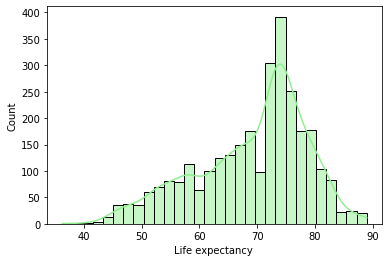

In [ ]:
import seaborn as sns

# life_exp.columns

sns.histplot(life_exp['Life expectancy '].dropna(), kde=True, color='lightgreen')

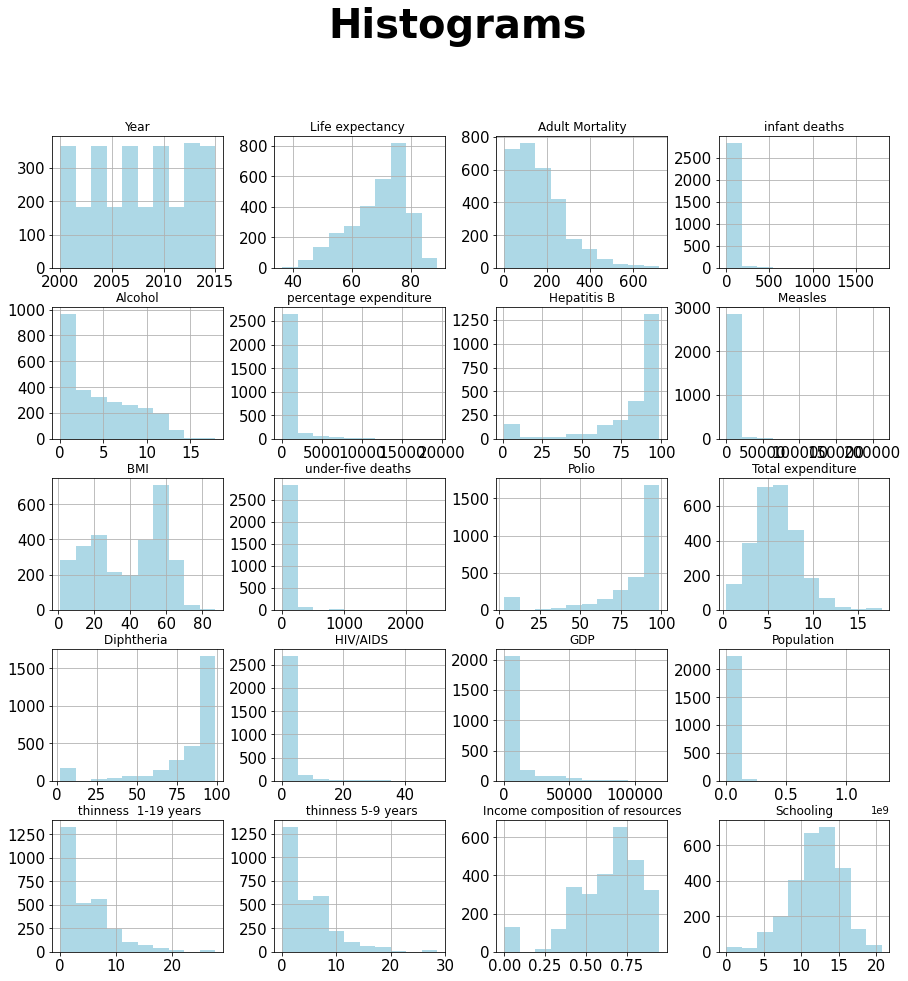

In [ ]:
life_exp.hist(sharex=False, sharey=False, xlabelsize=15, ylabelsize=15, color='lightblue',figsize=(15,15))
plt.suptitle("Histograms",y=1.00,fontweight='bold',fontsize=40)
plt.show()

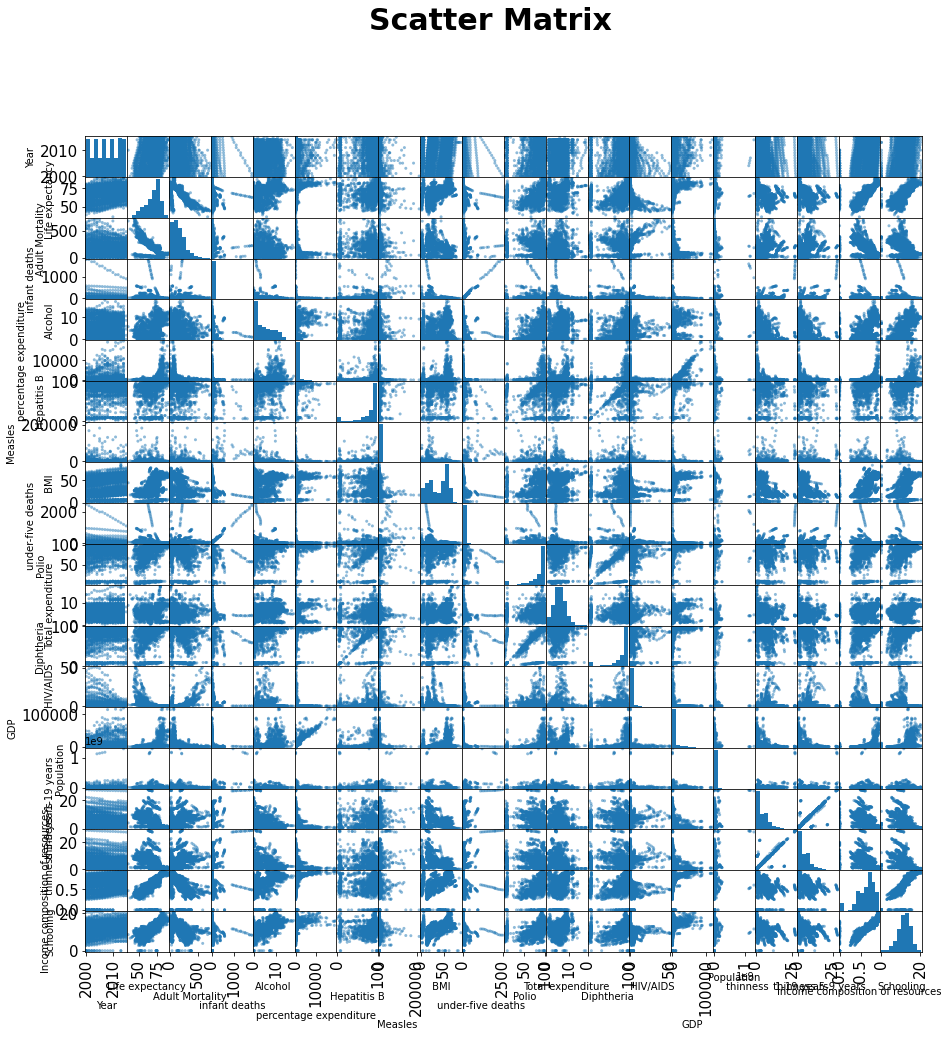

In [ ]:
from pandas.plotting._matplotlib import scatter_matrix
Axes=scatter_matrix(life_exp,figsize=(15,15))
plt.suptitle("Scatter Matrix",y=1.00,fontweight='bold',fontsize=30)
plt.rcParams['axes.labelsize'] = 15
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in Axes.ravel()]
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 15) for item in Axes.ravel()]
plt.show()

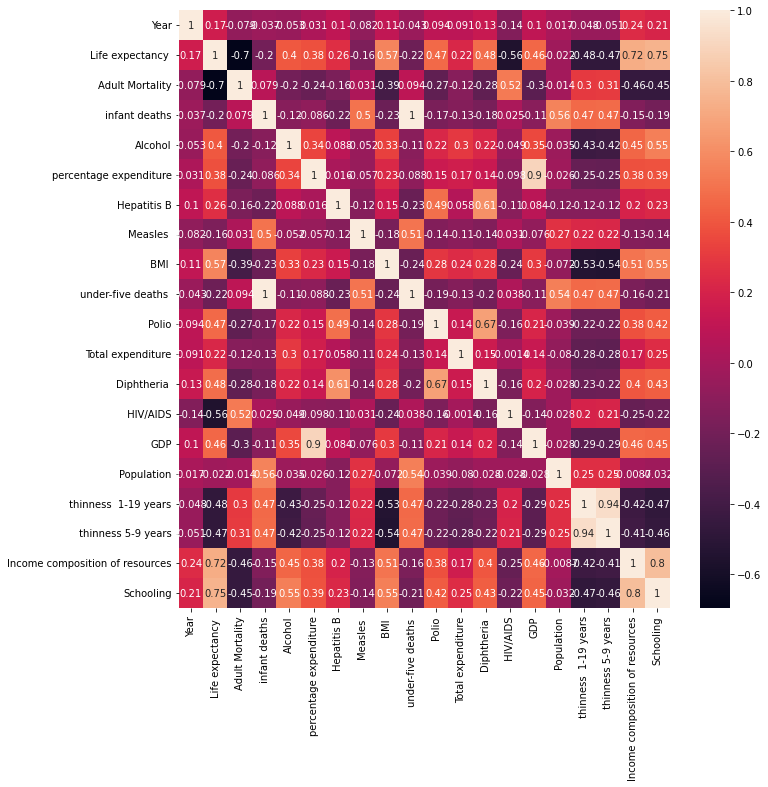

In [ ]:
import seaborn as sns
plt.figure(figsize = (11,11))
plt.style.use('default')
sns.heatmap(life_exp.corr(), annot = True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import numpy as np

In [ ]:
print("X_train")
print(X_train)
print("X_test")
print(X_test)
print("y_train")
print(y_train)
print("y_test")
print(y_test)

In [ ]:
dataset=range(16) # array from 0 to 15
list(dataset)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [ ]:
KFCrossValidator = KFold(n_splits=4, shuffle=True)
KFdataset = KFCrossValidator.split(dataset)

In [ ]:
print('{} {:^61} {}'.format('Round', 'Training set', 'Testing set'))
for iteration, data in enumerate(KFdataset, start=1):
      print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Round                         Training set                          Testing set
    1     [ 0  1  2  4  6  7  9 10 11 12 14 15]       [ 3  5  8 13]      
    2     [ 0  2  3  4  5  7  8  9 10 12 13 14]       [ 1  6 11 15]      
    3     [ 1  2  3  4  5  6  8  9 10 11 13 15]       [ 0  7 12 14]      
    4     [ 0  1  3  5  6  7  8 11 12 13 14 15]       [ 2  4  9 10]      


In [ ]:
import warnings
import pandas as pd
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [ ]:
array = life_exp.values
X = array[:,0:12]
Y = array[:,12] #area

In [ ]:
max_error_scoring = 'max_error'
neg_mean_absolute_error_scoring = 'neg_mean_absolute_error'
r2_scoring = 'r2'
neg_mean_squared_error_scoring = 'neg_mean_squared_error'

In [ ]:
pip install pycountry-convert

In [ ]:
import plotly.express as px
import pycountry_convert as pc

def continent_name(country_name):
  try:
    country_code = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
  except:
    return np.nan
  try:
    return pc.country_alpha2_to_continent_code(country_code)
  except:
    return np.nan

life_exp['Continent'] = life_exp.apply(lambda x: continent_name(x['Country']), axis=1)
fig = px.scatter(life_exp.dropna(), x='GDP', y='Life expectancy ', size='Population', color='Continent', hover_name='Country', log_x=True, size_max=40)
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

life_exp = life_exp.dropna()
target = life_exp['Life expectancy ']
features = life_exp[life_exp.columns.difference(['Life expectancy ', 'Year'])] # - 2 columns

x_train, x_test, y_train, y_test = train_test_split(pd.get_dummies(features), target, test_size=0.2) 

# https://stackoverflow.com/questions/36631163/what-are-the-pros-and-cons-between-get-dummies-pandas-and-onehotencoder-sciki
lr = LinearRegression()

lr.fit(x_train, y_train)

lr_confidence = lr.score(x_test, y_test)
print(lr_confidence)

0.9521355846307267


In [ ]:
r2_score(y_test, lr.predict(x_test))

0.9521355846307267

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



0.9521355846307267

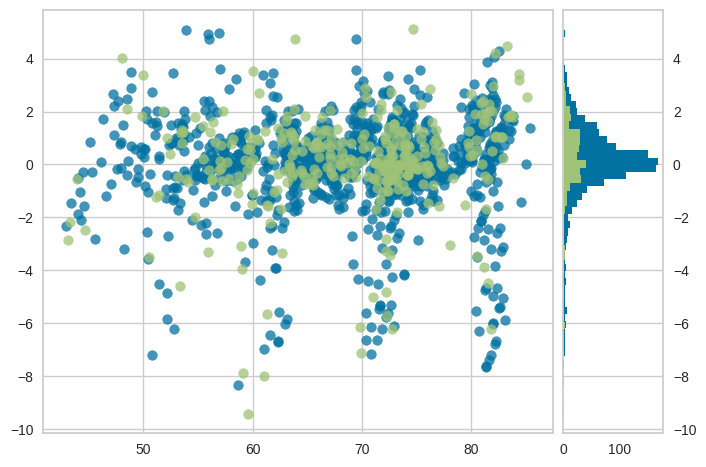

In [ ]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(lr)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data

In [ ]:
all_data_one_hot = pd.get_dummies(life_exp)

In [ ]:
life_exp[life_exp['Continent'] == 'AS']

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,AS
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,AS
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,AS
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,AS
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,Uzbekistan,2006,Developing,67.6,185.0,23,1.96,77.270921,98.0,823,38.1,27,94.0,5.49,96.0,0.4,654.283837,2648825.0,3.2,3.2,0.626,11.8,AS
2836,Uzbekistan,2005,Developing,67.3,192.0,24,1.78,40.133421,99.0,737,37.5,28,99.0,5.11,99.0,0.3,546.776852,26167.0,3.2,3.2,0.620,11.7,AS
2837,Uzbekistan,2004,Developing,67.8,183.0,24,1.59,34.418872,99.0,75,37.0,29,99.0,5.11,99.0,0.3,465.119887,2586435.0,3.2,3.2,0.613,11.6,AS
2838,Uzbekistan,2003,Developing,67.2,183.0,25,1.54,28.521358,99.0,85,36.4,30,99.0,5.17,98.0,0.3,396.129969,2556765.0,3.3,3.3,0.607,11.3,AS


In [ ]:
asia_data = all_data_one_hot[all_data_one_hot['Continent_AS'] == 1].dropna()

target = asia_data['Life expectancy ']
features = asia_data[asia_data.columns.difference(['Life expectancy ', 'Year'])] # - 2 columns

x_asia_train, x_asia_test, y_asia_train, y_asia_test = train_test_split(features, target, test_size=0.2) 

lr = LinearRegression()
lr.fit(x_asia_train, y_asia_train)

lr_confidence = lr.score(x_asia_test, y_asia_test)
print(lr_confidence)


0.9409745594350625


In [ ]:
x_test

,BMI,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Adult Mortality,Alcohol,Diphtheria,GDP,Hepatitis B,Income composition of resources,Measles,Polio,Population,Schooling,Total expenditure,infant deaths,percentage expenditure,under-five deaths,Continent_AF,Continent_AS,Continent_EU,Continent_NA,Continent_OC,Continent_SA,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bosnia and Herzegovina,...,Country_Papua New Guinea,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Romania,Country_Russian Federation,Country_Rwanda,Country_Samoa,Country_Sao Tome and Principe,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Solomon Islands,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Syrian Arab Republic,Country_Tajikistan,Country_Thailand,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
330,5.5,0.1,2.9,2.9,12.0,4.56,93.0,2968.411860,93.0,0.000,23,95.0,378153.0,12.5,8.50,0,45.713543,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2375,38.7,0.1,1.4,1.4,227.0,0.70,84.0,944.816840,83.0,0.442,0,88.0,423853.0,6.6,6.44,0,325.111475,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2690,58.5,0.1,5.0,4.8,126.0,1.29,9.0,834.869161,82.0,0.687,34,9.0,6876345.0,11.9,5.81,28,103.523776,34,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1871,46.4,0.3,2.0,1.9,194.0,3.70,86.0,1175.116225,86.0,0.592,0,87.0,5379328.0,11.0,6.11,3,218.571618,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,17.2,0.1,18.2,18.2,275.0,0.01,68.0,63.537231,68.0,0.454,3013,68.0,2978599.0,9.5,7.87,71,7.097109,97,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,53.6,0.9,3.3,3.3,166.0,6.02,88.0,5451.669600,83.0,0.697,0,85.0,9897985.0,12.9,4.60,6,664.558524,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
132,55.7,0.1,1.7,2.0,73.0,12.04,89.0,51126.741390,89.0,0.880,68,89.0,8391643.0,15.7,1.94,0,8272.306757,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1791,15.7,0.5,13.3,13.6,228.0,0.44,82.0,219.815669,39.0,0.455,1329,92.0,487377.0,7.8,1.97,66,4.154516,90,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2744,55.1,0.8,2.9,3.0,253.0,4.31,99.0,78.738243,7.0,0.673,16970,99.0,48683865.0,13.2,5.66,6,8.897421,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.metrics import r2_score

life_exp = life_exp.dropna()
target = life_exp['Life expectancy ']
features = life_exp[life_exp.columns.difference(['Life expectancy ', 'Year'])] # - 2 columns

x_train, x_test, y_train, y_test = train_test_split(pd.get_dummies(features), target, test_size=0.2) 

lasso = Lasso(tol=1e-2)

lasso.fit(x_train, y_train)

lasso_confidence = lasso.score(x_test, y_test)
print(lasso_confidence)

0.8510992400456582


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 11750.507919248652, tolerance: 975.3981948210203



In [ ]:
y_test[x_test['Continent'] ==1]

In [ ]:
x_test['Continent'] ==1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

life_exp = pd.get_dummies(life_exp)
life_exp = life_exp.dropna()

target = np.array(life_exp['Life expectancy '])
# features = life_exp[life_exp.columns.difference(['Life expectancy ', 'Year'])] # - 2 columns
df = pd.DataFrame(columns=['name', 'value'])

for column in life_exp[life_exp.columns.difference(['Life expectancy ', 'Year', 'Country', 'Status'])]:
  features = np.array(life_exp[column])
  x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

  lr = LinearRegression()

  lr.fit(x_train.reshape(-1, 1), y_train)

  lr_confidence = lr.score(x_test.reshape(-1, 1), y_test)
  # print("Column: ", column, lr_confidence)
  df = df.append({'name': column, 'value': lr_confidence}, ignore_index=True)

df.sort_values(['value'], ascending=False).groupby('value').head()

,name,value
151,Schooling,0.575790
147,Income composition of resources,0.571891
4,Adult Mortality,0.499422
6,Continent_AF,0.383972
1,HIV/AIDS,0.295290
...,...,...
91,Country_Mauritius,-0.009620
113,Country_Russian Federation,-0.009675
24,Country_Belize,-0.009721
119,Country_Seychelles,-0.015732


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

data = pd.read_csv('Life Expectancy Data.csv')
life_exp = data.dropna()

target = np.array(life_exp['Life expectancy '])
# features = life_exp[life_exp.columns.difference(['Life expectancy ', 'Year'])] # - 2 columns
df = pd.DataFrame(columns=['name', 'value'])

for col_type, column in zip(life_exp.dtypes, life_exp[life_exp.columns.difference(['Life expectancy ', 'Year', 'Country', 'Status'])]): # , 'Country', 'Status' 
  if(col_type == 'object'):
    # features = np.array(pd.get_dummies(life_exp[column]))
    print(column)
    continue
  else:
    features = np.array(life_exp[column])
  x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

  # print(x_train.shape)
  # print(y_train.shape)
  lr = LinearRegression()

  lr.fit(x_train.reshape(-1, 1), y_train)

  lr_confidence = lr.score(x_test.reshape(-1, 1), y_test)
  # print("Column: ", column, lr_confidence)
  df = df.append({'name': column, 'value': lr_confidence}, ignore_index=True)

pd.set_option('display.max_rows', 300)
df.sort_values(['value'], ascending=False).groupby('value').head()

 BMI 
 thinness  1-19 years


,name,value
11,Schooling,0.537677
2,Adult Mortality,0.475854
7,Income composition of resources,0.431136
0,HIV/AIDS,0.316642
3,Alcohol,0.223274
1,thinness 5-9 years,0.191128
5,GDP,0.190119
4,Diphtheria,0.160303
14,percentage expenditure,0.124675
9,Polio,0.078819


In [36]:
life_exp.corr()['Life expectancy ']

Year                               0.050771
Life expectancy                    1.000000
Adult Mortality                   -0.702523
infant deaths                     -0.169074
Alcohol                            0.402718
percentage expenditure             0.409631
Hepatitis B                        0.199935
Measles                           -0.068881
 BMI                               0.542042
under-five deaths                 -0.192265
Polio                              0.327294
Total expenditure                  0.174718
Diphtheria                         0.341331
 HIV/AIDS                         -0.592236
GDP                                0.441322
Population                        -0.022305
 thinness  1-19 years             -0.457838
 thinness 5-9 years               -0.457508
Income composition of resources    0.721083
Schooling                          0.727630
Name: Life expectancy , dtype: float64